<a href="https://colab.research.google.com/github/d-melamed/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/DM_Copy_of_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-09-03 01:50:59--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.96.6
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.96.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’

instacart_online_gr 100%[===================>] 196.03M  16.6MB/s    in 13s     

2020-09-03 01:51:13 (14.7 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [5]:
##### YOUR CODE HERE #####
import pandas as pd
import numpy as np

order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')


In [6]:
order_products = pd.concat([order_products__prior, order_products__train])

In [7]:
topItems = pd.merge(order_products, products, on='product_id', how='left')

In [8]:
topItems.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [9]:
topItems['product_name'].value_counts().head(10)

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [10]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [11]:
# table2 -> tidy

table2 = table2.reset_index()

table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [12]:
tidy = table2.melt(id_vars='index', value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy = tidy.rename(columns={
    'index': 'trt',
    'variable': 'name',
    'value': 'result'
})
tidy = tidy[['name', 'trt', 'result']]
tidy

,name,trt,result
0,John Smith,treatmenta,NaN
1,John Smith,treatmentb,2.0
2,Jane Doe,treatmenta,16.0
3,Jane Doe,treatmentb,11.0
4,Mary Johnson,treatmenta,3.0
5,Mary Johnson,treatmentb,1.0


In [13]:
# tidy -> table2

In [14]:
tbl2 = tidy.pivot_table(index='name', columns='trt', values='result')

tbl2

trt,treatmenta,treatmentb
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [15]:
import seaborn as sns
flights = sns.load_dataset('flights')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
flights.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [17]:
# Flights Pivot Table
flights_pivot = flights.pivot_table(index='year', columns='month', values='passengers')

flights_pivot

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [18]:
##### YOUR CODE HERE #####
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [19]:
df = order_products['product_id'].value_counts().to_frame()

df.head()

,product_id
24852,491291
13176,394930
21137,275577
21903,251705
47209,220877


In [20]:
df = df.reset_index()
df.columns = ['product_id', '#_product_orders']

In [21]:
df.head()

,product_id,#_product_orders
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877


In [22]:
condition = df['#_product_orders'] > 2900

df = df[condition]

In [23]:
print(df.shape)
df.head()

(2051, 2)


,product_id,#_product_orders
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877


In [24]:
condition = order_products['product_id'].isin(df['product_id'])

order_products_subset = order_products[condition]

order_products_subset

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
5,2,17794,6,1
9,3,33754,1,1
...,...,...,...,...
1384610,3421063,49235,1,1
1384612,3421063,14233,3,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [25]:
order_products_subset = order_products_subset.drop(['add_to_cart_order', 'reordered'], axis=1)

In [26]:
merged = pd.merge(order_products_subset, orders[['order_id', 'order_hour_of_day']], on='order_id', how='left')

print(merged.shape)
merged.head()

(22450886, 3)


,order_id,product_id,order_hour_of_day
0,2,33120,9
1,2,28985,9
2,2,9327,9
3,2,17794,9
4,3,33754,17


In [27]:
merged = pd.merge(merged, products[['product_id', 'product_name']], on='product_id', how='left')

In [28]:
print(merged.shape)
merged.head()

(22450886, 4)


,order_id,product_id,order_hour_of_day,product_name
0,2,33120,9,Organic Egg Whites
1,2,28985,9,Michigan Organic Kale
2,2,9327,9,Garlic Powder
3,2,17794,9,Carrots
4,3,33754,17,Total 2% with Strawberry Lowfat Greek Strained...


In [29]:
avg = merged.groupby('product_id', as_index=False)['order_hour_of_day'].mean()

avg.head(10)

,product_id,order_hour_of_day
0,34,13.511285
1,45,13.398624
2,79,13.502530
3,116,12.516822
4,117,13.392173
5,130,13.073781
6,141,13.571202
7,148,13.182600
8,160,13.642124
9,162,13.358889


In [30]:
avg.shape

(2051, 2)

In [31]:
merged_avg = pd.merge(avg, products[['product_id', 'product_name']], on='product_id', how='left')

print(merged_avg.shape)
merged_avg.head(25)

(2051, 3)


,product_id,order_hour_of_day,product_name
0,34,13.511285,Peanut Butter Cereal
1,45,13.398624,European Cucumber
2,79,13.502530,Wild Albacore Tuna No Salt Added
3,116,12.516822,English Muffins
4,117,13.392173,Petit Suisse Fruit
5,130,13.073781,Vanilla Milk Chocolate Almond Ice Cream Bars M...
6,141,13.571202,Restaurant Style Organic Chia & Quinoa Tortill...
7,148,13.182600,Nectarines
8,160,13.642124,100% Recycled Aluminum Foil
9,162,13.358889,Organic Mini Homestyle Waffles


In [32]:
merged_avg = merged_avg.sort_values(by='order_hour_of_day', ascending=False)

merged_avg.head(25)

,product_id,order_hour_of_day,product_name
1257,30668,14.526986,Half Baked Frozen Yogurt
1872,45541,14.526299,The Tonight Dough™ Ice Cream
1883,45681,14.394912,Americone Dream® Ice Cream
1903,46175,14.388942,Half Baked® Ice Cream
593,14335,14.373308,Phish Food® Ice Cream
1576,38374,14.369711,Milk and Cookies Ice Cream
1559,38003,14.306421,Sicilian Pistachio
1189,28682,14.303480,Chocolate Peanut Butter Cup Gelato
2001,48523,14.292018,Birthday Cake Light Ice Cream
1980,47993,14.270300,Cherry Garcia Ice Cream


## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [33]:
##### YOUR CODE HERE #####

viz = (products[['product_id', 'product_name', ]]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))

print(viz.shape)
viz.head()

(33819106, 4)


,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [35]:
product_names = ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 
                 'Organic Hass Avocado', 'Organic Avocado', 'Large Lemon', 'Strawberries', 'Limes', 
                 'Organic Whole Milk']

condition = viz['product_name'].isin(product_names)

subset = viz[condition]

print(subset.shape)
subset.head()

(2418314, 4)


,product_id,product_name,order_id,order_hour_of_day
7,13176,Bag of Organic Bananas,1107,11
8,16797,Strawberries,1107,11
20,16797,Strawberries,5319,14
47,16797,Strawberries,9273,15
51,21903,Organic Baby Spinach,9273,15


In [36]:
wide = pd.crosstab(subset['order_hour_of_day'],
            subset['product_name'],
            normalize='columns')

In [37]:
melted = wide.reset_index().melt(id_vars='order_hour_of_day')

melted.head()

,order_hour_of_day,product_name,value
0,0,Bag of Organic Bananas,0.007184
1,1,Bag of Organic Bananas,0.003661
2,2,Bag of Organic Bananas,0.002127
3,3,Bag of Organic Bananas,0.001519
4,4,Bag of Organic Bananas,0.001590


In [38]:
melted = melted.rename(columns={
    'order_hour_of_day':'Hour of Day Ordered',
    'product_name': 'Product',
    'value': 'Percent of Orders by Product'
})

melted

,Hour of Day Ordered,Product,Percent of Orders by Product
0,0,Bag of Organic Bananas,0.007184
1,1,Bag of Organic Bananas,0.003661
2,2,Bag of Organic Bananas,0.002127
3,3,Bag of Organic Bananas,0.001519
4,4,Bag of Organic Bananas,0.001590
...,...,...,...
235,19,Strawberries,0.037766
236,20,Strawberries,0.030433
237,21,Strawberries,0.025561
238,22,Strawberries,0.020516


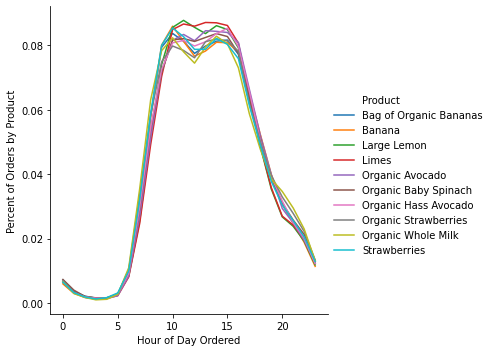

In [39]:
import seaborn as sns

sns.relplot(x='Hour of Day Ordered', y='Percent of Orders by Product', hue='Product', data=melted, kind='line');